In [1]:
import os
import sys

cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(os.path.dirname(os.path.dirname(cur_dir)))
# print(pkg_rootdir)
if pkg_rootdir not in sys.path:
    sys.path.append(pkg_rootdir)
# print(sys.path)

In [2]:
from Utils.mol2fp import GetPubChemFPs

fp_generator = GetPubChemFPs

In [3]:
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

X_train = pd.read_csv("./X_train_features.csv")
X_test = pd.read_csv("./X_test_features.csv")
X_out = pd.read_csv("./X_out_features.csv")

In [ ]:
# import os
# import json

# # 定义存储 JSON 数据的字典
# json_data = {}
# # 指定 JSON 文件所在的目录
# json_dir = "./"
# # 遍历目录中的所有文件
# for file_name in os.listdir(json_dir):
#     if file_name.endswith(".json"):  # 检查文件是否为 JSON 文件
#         file_path = os.path.join(json_dir, file_name)
#         with open(file_path, "r") as file:
#             json_data[file_name.replace(".json", "")] = json.load(file)

# best_params_D = json_data["best_params_D"]
# best_params_P = json_data["best_params_P"]
# best_params_H = json_data["best_params_H"]

In [4]:
def shap_analysis(model, X, title=""):
    # Create SHAP explainer
    explainer = shap.Explainer(model, X)

    shap_values = explainer(X)

    # 创建一个包含两个子图的画布
    fig = plt.figure()

    ax0 = fig.add_subplot(121)
    shap.plots.bar(shap_values, show=False, max_display=11)
    plt.gca().tick_params(labelsize=12)  # 调整字体大小

    ax1 = fig.add_subplot(122)
    shap.plots.beeswarm(shap_values, show=False, max_display=11)
    plt.gca().tick_params(labelsize=12)  # 调整字体大小

    plt.gcf().set_size_inches(14, 6)

    # 添加标题
    plt.suptitle(title)

    # 显示图形
    plt.tight_layout()  # 调整布局以避免标题重叠
    plt.show()

In [5]:
model_D = joblib.load("model_D.joblib")
model_P = joblib.load("model_P.joblib")
model_H = joblib.load("model_H.joblib")

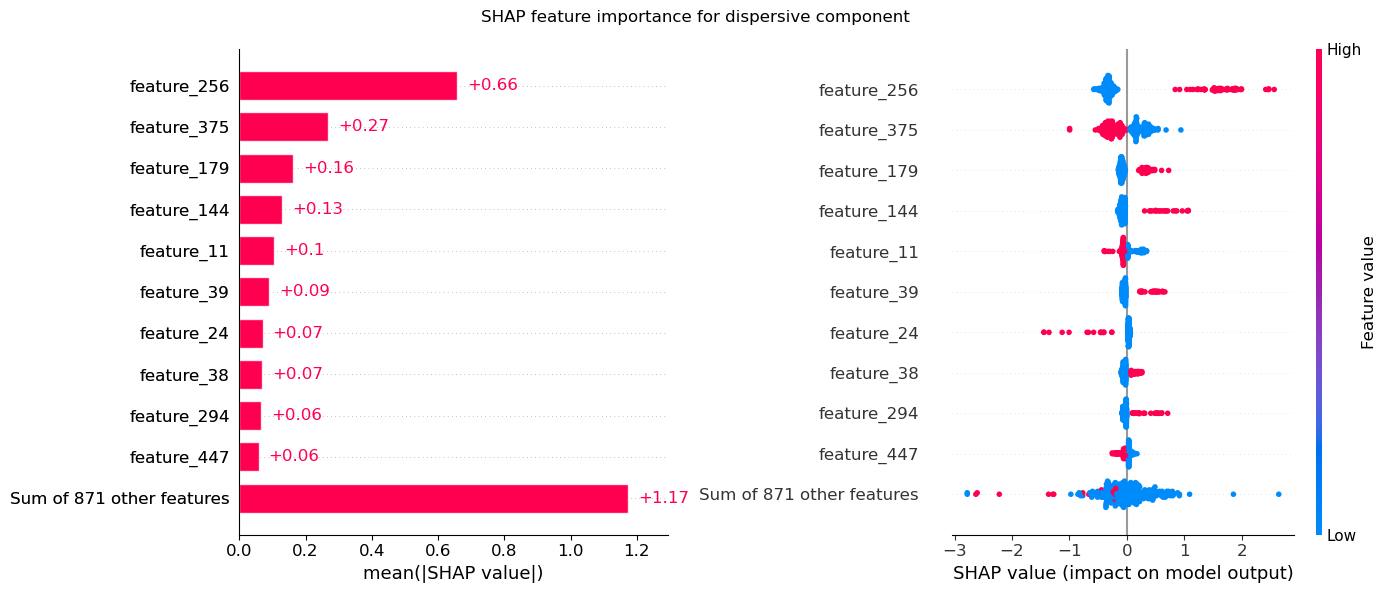

In [ ]:
shap_analysis(model_D, X_test, title="SHAP feature importance for dispersive component")

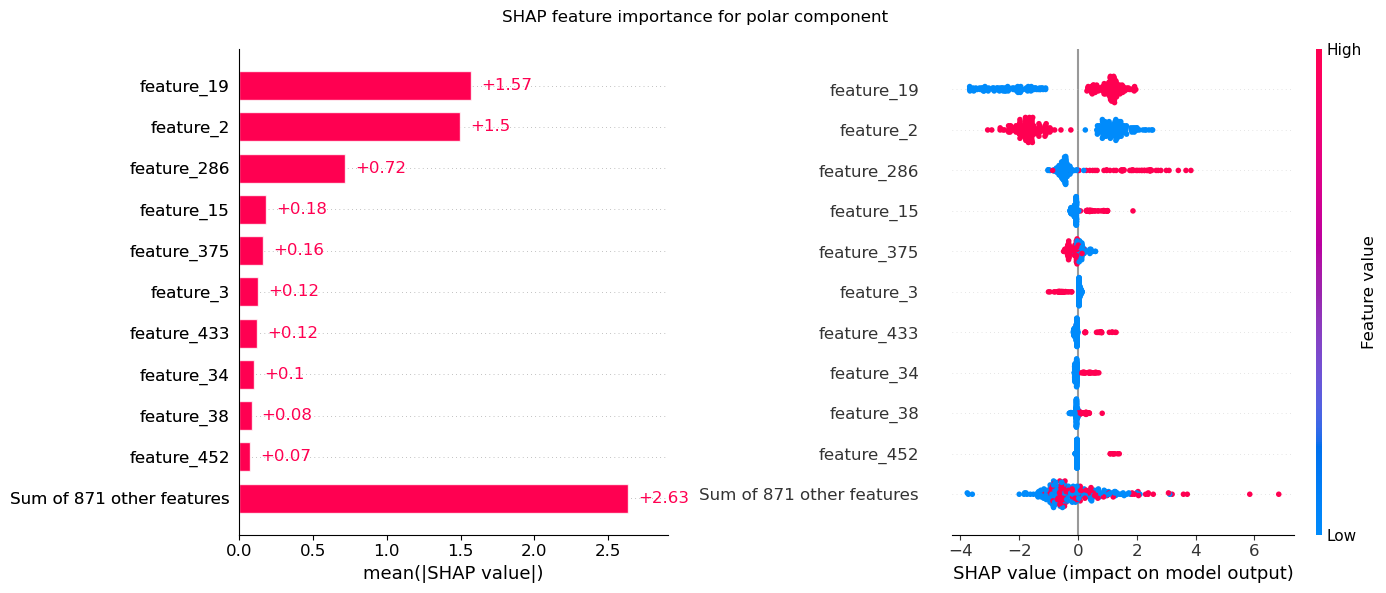

In [6]:
shap_analysis(model_P, X_test, title="SHAP feature importance for polar component")

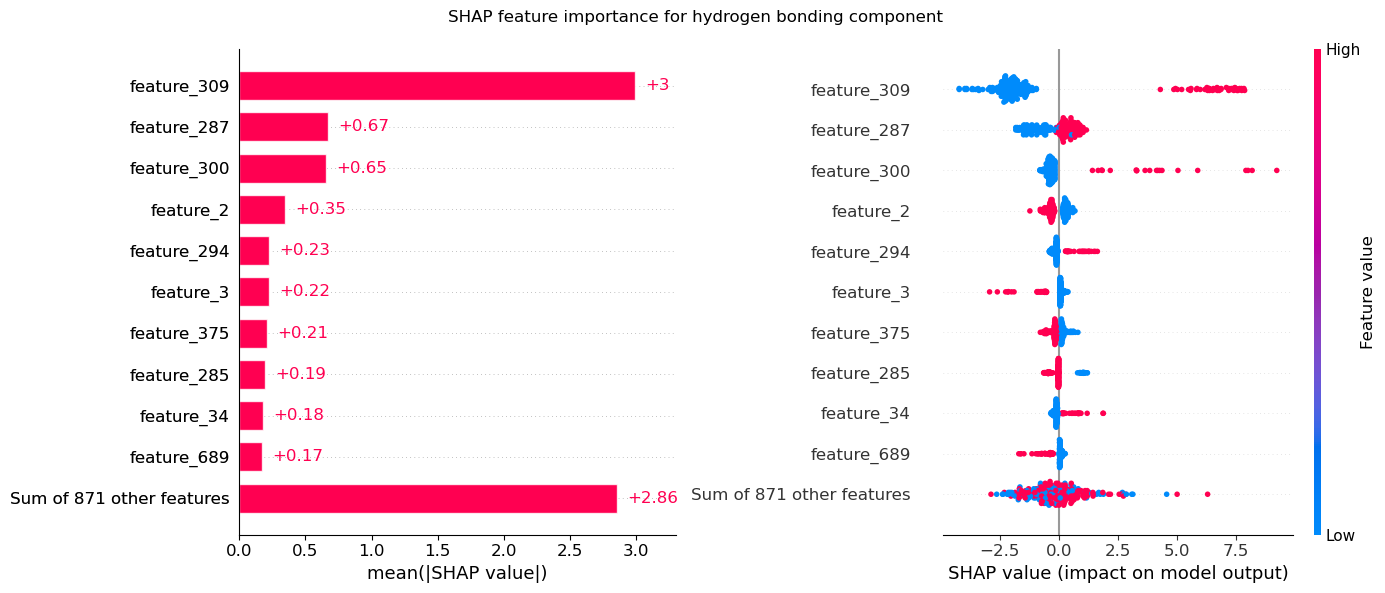

In [ ]:
shap_analysis(
    model_H, X_test, title="SHAP feature importance for hydrogen bonding component"
)